In [1]:
%matplotlib inline
from fastai.basics import *

# Linear Regression problem

In [3]:
n=100

In [4]:
x = torch.ones(n,2)
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.8406,  1.0000],
        [ 0.5713,  1.0000],
        [ 0.8730,  1.0000],
        [ 0.3380,  1.0000],
        [ 0.8949,  1.0000]])

In [5]:
a =tensor(3.,2);a

tensor([3., 2.])

In [6]:
y = x@a + torch.randn(n)

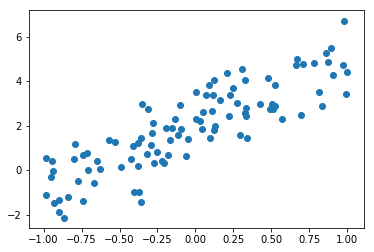

In [7]:
plt.scatter(x[:,0],y);

In [8]:
def mse(y_hat,y):
    return ((y_hat-y)**2).mean()

In [9]:
a = tensor(-1.,1)

In [10]:
y_hat = x@a
mse(y_hat,y)

tensor(6.3819)

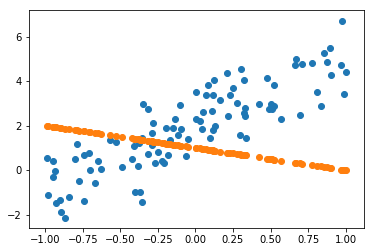

In [11]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

# Gradient Descent

In [13]:
a = nn.Parameter(a);a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [14]:
def update():
    y_hat = x@a
    loss = mse(y_hat,y)
    if t%10 == 0:
        print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [15]:
lr = 1e-1
for t in range(100):
    update()

tensor(6.3819, grad_fn=<MeanBackward0>)
tensor(2.2849, grad_fn=<MeanBackward0>)
tensor(1.3055, grad_fn=<MeanBackward0>)
tensor(1.0303, grad_fn=<MeanBackward0>)
tensor(0.9524, grad_fn=<MeanBackward0>)
tensor(0.9303, grad_fn=<MeanBackward0>)
tensor(0.9241, grad_fn=<MeanBackward0>)
tensor(0.9223, grad_fn=<MeanBackward0>)
tensor(0.9218, grad_fn=<MeanBackward0>)
tensor(0.9217, grad_fn=<MeanBackward0>)


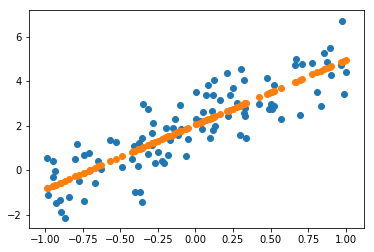

In [16]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a)

Animate it!

In [17]:
from matplotlib import animation, rc
rc('animation',html='jshtml')

In [20]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0],y,c='orange')
line, = plt.plot(x[:,0],x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0,100),interval=20)